In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 데이터 불러오기

In [2]:
#pm10 = pd.read_csv('pm_2010_2020.csv')
pm10 = pd.read_csv('./ad/pm10_2020.csv')
car = pd.read_csv('./ad/car_2010_2020.csv')
covid = pd.read_csv('./ad/data_covid.csv')

In [3]:
covid = covid.loc[:278].drop(columns =['누적 확진자'])
covid = covid.rename(columns = {'Unnamed: 0': 'DATE', '신규 확진자' : 'Patient'})
pm10 = pm10.rename(columns = {'Unnamed: 0': 'DATE'})

In [4]:
pm10.index = pd.to_datetime(pm10['DATE'])
pm10 = pm10['PM10']

car.index = pd.to_datetime(car['DATE'])
car = car['CAR']

covid.index = pd.to_datetime(covid['DATE'])
covid = covid['Patient']

In [5]:
covid_df = pd.DataFrame(covid)
covid_df

,Patient
DATE,
2020-01-21,0.0
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,1.0
2020-01-25,0.0
2020-01-26,1.0
2020-01-27,1.0
2020-01-28,0.0
2020-01-29,0.0


In [6]:
pm10_df = pd.DataFrame(pm10)
pm10_df

,PM10
DATE,
2020-01-01,26.505952
2020-01-02,54.880952
2020-01-03,70.535714
2020-01-04,59.886905
2020-01-05,49.994048
2020-01-06,36.190476
2020-01-07,14.136905
2020-01-08,22.309524
2020-01-09,38.458333


In [7]:
car_df = pd.DataFrame(car)
car_df

,CAR
DATE,
2010-01-01 00:00:00,105711.0
2010-01-01 01:00:00,101665.0
2010-01-01 02:00:00,80165.0
2010-01-01 03:00:00,61292.0
2010-01-01 04:00:00,58557.0
2010-01-01 05:00:00,68502.0
2010-01-01 06:00:00,82158.0
2010-01-01 07:00:00,102563.0
2010-01-01 08:00:00,149815.0


- Covid : 하루 단위로 전국 코로나 확진자를 나타냅니다.
- PM10 : 한 시간 단위로 전국 평균 미세먼지 농도를 나타냅니다.
- CAR : 한 시간 단위로 전국 평균 교통량을 나타냅니다.

# 데이터 전처리

LSTM에 넣고 사용하기 위해선 세 데이터의 길이가 같아야 합니다. 그래서 짧은 PM10을 기준으로 데이터의 길이를 맞춰줍니다.

In [8]:
pm10_day = pm10_df.loc['2020-01-31':'2020-10-25']
pm10_day = pm10_day.groupby(pd.Grouper(freq='W')).mean()
#pm10_day = pd.DataFrame(pm10_day)

car_day = car_df.loc['2020-01-31':'2020-10-25']
car_day = car_day.groupby(pd.Grouper(freq='W')).sum()
car_day = pd.DataFrame(car_day)

covid_day = covid.loc['2020-01-31':'2020-10-25']
covid_day = covid_day.groupby(pd.Grouper(freq='W')).mean()
covid_day = pd.DataFrame(covid_day)

In [9]:
pm10_day

,PM10
DATE,
2020-02-02,57.186508
2020-02-09,32.591837
2020-02-16,46.110544
2020-02-23,39.725340
2020-03-01,25.394558
2020-03-08,36.637755
2020-03-15,36.343537
2020-03-22,46.282313
2020-03-29,39.425170


In [10]:
car_day

,CAR
DATE,
2020-02-02,16809669.0
2020-02-09,41194908.0
2020-02-16,42337551.0
2020-02-23,40273667.0
2020-03-01,36365193.0
2020-03-08,37944868.0
2020-03-15,39459696.0
2020-03-22,41187028.0
2020-03-29,43296792.0


In [11]:
covid_day

,Patient
DATE,
2020-02-02,3.666667
2020-02-09,1.428571
2020-02-16,0.571429
2020-02-23,81.714286
2020-03-01,417.857143
2020-03-08,515.428571
2020-03-15,146.857143
2020-03-22,105.000000
2020-03-29,98.000000


코로나 데이터가 하루 단위이기 때문에 pm10과 car도 하루 단위로 바꾸고 2020-01-01 ~ 2020-06-25까지 바꿔줍니다.

In [12]:
Dataset_0625 = pd.concat([pm10_day, car_day, covid_day], axis = 1)

In [13]:
Dataset_0625

,PM10,CAR,Patient
DATE,,,
2020-02-02,57.186508,16809669.0,3.666667
2020-02-09,32.591837,41194908.0,1.428571
2020-02-16,46.110544,42337551.0,0.571429
2020-02-23,39.725340,40273667.0,81.714286
2020-03-01,25.394558,36365193.0,417.857143
2020-03-08,36.637755,37944868.0,515.428571
2020-03-15,36.343537,39459696.0,146.857143
2020-03-22,46.282313,41187028.0,105.000000
2020-03-29,39.425170,43296792.0,98.000000


## Normalization

PM10, CAR, Patient에 minmax를 적용해 normalization을 진행합니다.

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['PM10', 'CAR', 'Patient']
Ds_scaled = scaler.fit_transform(Dataset_0625[scale_cols])

Ds_scaled = pd.DataFrame(Ds_scaled)
Ds_scaled.columns = scale_cols

pd.DataFrame(Ds_scaled)

,PM10,CAR,Patient
0,1.000000,0.000000,0.006012
1,0.405636,0.750934,0.001665
2,0.732334,0.786122,0.000000
3,0.578027,0.722565,0.157603
4,0.231703,0.602205,0.810488
5,0.503411,0.650850,1.000000
6,0.496301,0.697499,0.284129
7,0.736485,0.750692,0.202830
8,0.570773,0.815661,0.189234
9,0.739609,0.800485,0.180355


In [35]:
a = pd.concat([pd.DataFrame([0]),pd.DataFrame(Ds_scaled)['Patient']])

a = a.reset_index().drop(columns ='index')

Ds_scaled = pd.concat([a,Ds_scaled],axis = 1)

#Ds_scaled = Ds_scaled.loc[:268]
Ds_scaled = Ds_scaled.loc[:38]
Ds_scaled.rename(columns = {0 : 'PP'}, inplace = True)


In [36]:
Ds_scaled

,PP,PM10,CAR,Patient
0,0.000000,1.000000,0.000000,0.006012
1,0.006012,0.405636,0.750934,0.001665
2,0.001665,0.732334,0.786122,0.000000
3,0.000000,0.578027,0.722565,0.157603
4,0.157603,0.231703,0.602205,0.810488
5,0.810488,0.503411,0.650850,1.000000
6,1.000000,0.496301,0.697499,0.284129
7,0.284129,0.736485,0.750692,0.202830
8,0.202830,0.570773,0.815661,0.189234
9,0.189234,0.739609,0.800485,0.180355


## 학습시킬 Dataset 생성

window_size를 이용하여 학습데이터를 생성합니다. window_size는 얼마동안(기간)의 데이터에 기반하여 다음날 코로나 확진자를 예측할 것인가를 정하는 parameter 입니다. 즉 과거 20일을 기반으로 내일 데이터를 예측한다라고 가정했을 때는 window_size=20이 됩니다.

In [68]:
# Test_data 개수 설정
TEST_SIZE = 7

In [69]:
train = Ds_scaled[:-TEST_SIZE]
test = Ds_scaled[-TEST_SIZE:]

In [70]:
train

,PP,PM10,CAR,Patient
0,0.000000,1.000000,0.000000,0.006012
1,0.006012,0.405636,0.750934,0.001665
2,0.001665,0.732334,0.786122,0.000000
3,0.000000,0.578027,0.722565,0.157603
4,0.157603,0.231703,0.602205,0.810488
5,0.810488,0.503411,0.650850,1.000000
6,1.000000,0.496301,0.697499,0.284129
7,0.284129,0.736485,0.750692,0.202830
8,0.202830,0.570773,0.815661,0.189234
9,0.189234,0.739609,0.800485,0.180355


In [85]:
def make_dataset(data, label, window_size=5):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [86]:
feature_cols = ['PP','PM10','CAR']
label_cols = ['Patient']
window_size = 5

train_feature = train[feature_cols]
train_label = train[label_cols]

test_feature = test[feature_cols]
test_label = test[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, window_size)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape
# seq를 취하기 때문에 window_size에 따라 전체 데이터 수가 줄어든다.

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, window_size)
test_feature.shape, test_label.shape

((2, 5, 3), (2, 1))

In [87]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(64, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

모델은 매우 간단한 모델을 적용하였습니다. 오히려 너무 복잡한 모델이 과적합을 유발하고, 학습도 잘 되지 못하는 결과를 낳을 수 있습니다.

In [88]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join('tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Train on 21 samples, validate on 6 samples
Epoch 1/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0931 - val_loss: 0.2735

Epoch 00001: val_loss improved from inf to 0.27348, saving model to tmp_checkpoint.h5
Epoch 2/200
21/21 [==============================] - 0s 285us/step - loss: 0.0806 - val_loss: 0.2508

Epoch 00002: val_loss improved from 0.27348 to 0.25079, saving model to tmp_checkpoint.h5
Epoch 3/200
21/21 [==============================] - 0s 283us/step - loss: 0.0692 - val_loss: 0.2294

Epoch 00003: val_loss improved from 0.25079 to 0.22938, saving model to tmp_checkpoint.h5
Epoch 4/200
21/21 [==============================] - 0s 285us/step - loss: 0.0578 - val_loss: 0.2094

Epoch 00004: val_loss improved from 0.22938 to 0.20945, saving model to tmp_checkpoint.h5
Epoch 5/200
21/21 [==============================] - 0s 285us/step - loss: 0.0492 - val_loss: 0.1910

Epoch 00005: val_loss improved from 0.20945 to 0.19101, saving model to tmp_checkpoint.h5
Ep

In [89]:
# weight 로딩
model.load_weights(filename)

# 예측
pred = model.predict(test_feature)

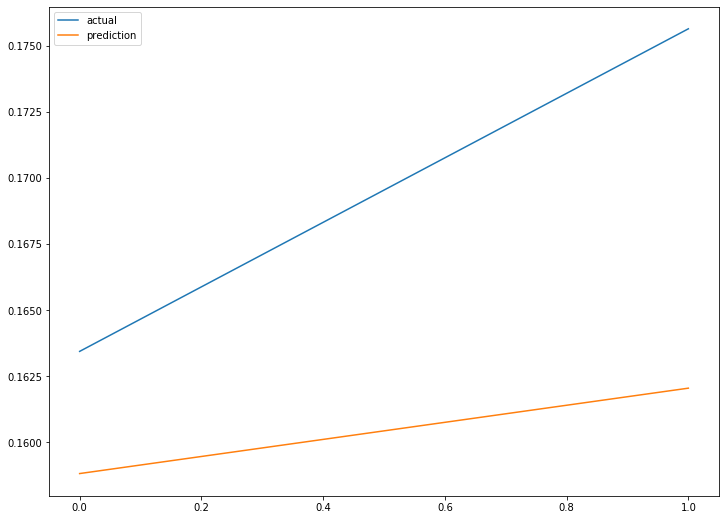

In [90]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

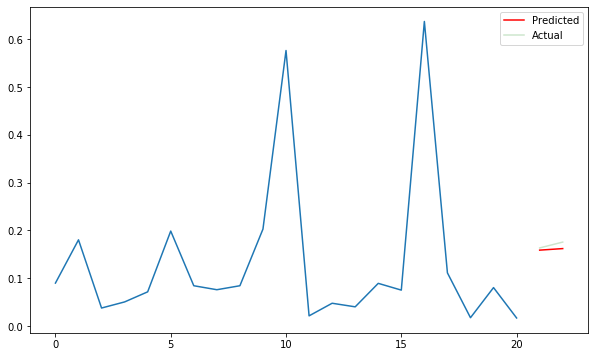

In [91]:
a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize=(10,6))
plt.plot(a_axis, y_train.reshape(-1), '-')
plt.plot(b_axis, pred.reshape(-1), '-', color='red', label='Predicted')
plt.plot(b_axis, test_label.reshape(-1), '-', color='green', alpha=0.2, label='Actual')

plt.legend()
plt.show()